# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import statistics
from texttable import Texttable
from datetime import date
import matplotlib.pyplot as plt

/home/jehoram/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### LOAD DATA

In [2]:
from sklearn.datasets import load_iris
# load the iris dataset 
iris = load_iris()
original_iris_dataframe = pd.DataFrame(columns=iris.feature_names, data=iris.data) 
original_iris_dataframe['target'] = iris.target 

print("original iris dataframe")
print(original_iris_dataframe)

print("Number of samples and dimentions for original iris data : " + str(original_iris_dataframe.shape) + "\n")
print("Number of values for original iris data : % s"%(original_iris_dataframe.shape[0]) + "\n")
print("Number of features for original iris data : % s"%(original_iris_dataframe.shape[1]) + "\n")

print("description of original iris dataframe")
print(original_iris_dataframe.head())
print(original_iris_dataframe.describe())

# divide the dataset into class and target variable 
X_iris = original_iris_dataframe.iloc[:, 0:4].values 
y_iris = original_iris_dataframe.iloc[:, 4].values 

original iris dataframe
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

   

In [3]:
print(X_iris[:,0].shape)
print(X_iris[:,0])

(150,)
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


In [4]:
print(X_iris[:,3].shape)
print(X_iris[:,3])

(150,)
[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.  2.3 1.8]


In [5]:
print(y_iris.shape)
print(y_iris)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### PLOTTING FOR RANDOM FEATURES FOR ORIGINAL IRIS DATA

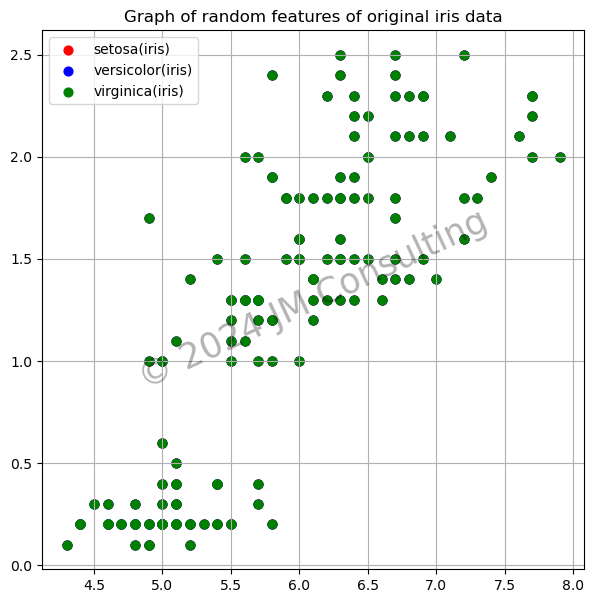

In [6]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1)
ax.set_title('Graph of random features of original iris data')

targets = ['setosa(iris)', 'versicolor(iris)', 'virginica(iris)']
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
	indicesNeeded = original_iris_dataframe['target'] == target
	ax.scatter(X_iris[:,0], X_iris[:,3], 
	c = color, 
	s = 40)
ax.legend(targets)
ax.grid()
copyright = "\u00A9" + " " + str(date.today().year) + " " + "JM Consulting"
#current_year = str(date.today().year)
#print("copyright : % s"%("\u00A9"))
plt.text(0.5, 0.5, copyright, alpha=0.3, fontsize=25, rotation=25, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

### NORMALIZATION

### USING normalize()

In [7]:
#normalize() function to normalize an array-like dataset by sample (row).
iris_dataframe_2_array = original_iris_dataframe.values
normalized_iris_dataframe = preprocessing.normalize(iris_dataframe_2_array)
print("Normalized iris dataframe using normalize() : ")
normalized_iris_dataframe
#for normalized_iris_dataframe_values in normalized_iris_dataframe:
#	normalized_iris_dataframe_values = normalized_iris_dataframe[0]
#	print("Normalized data set_2 : % s"%(normalized_iris_dataframe_values))

Normalized iris dataframe using normalize() : 


array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 , 0.        ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134, 0.        ],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949, 0.        ],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392, 0.        ],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 , 0.        ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704, 0.        ],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 , 0.        ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 , 0.        ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562, 0.        ],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451, 0.        ],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797, 0.        ],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129, 0.        ],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734, 0.        ],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308, 0.        ],
       [0.81120865, 0.55945424, 0.

In [8]:
X_iris_to_array = np.array(X_iris)
normalized_X_iris = preprocessing.normalize(X_iris_to_array)
print("Normalized X iris data using normalize() : ")
normalized_X_iris

Normalized X iris data using normalize() : 


array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [9]:
y_iris_to_array = np.array([y_iris])
normalized_y_iris = preprocessing.normalize(y_iris_to_array)
print("Normalized y iris dataframe using normalize() : ")
normalized_y_iris

Normalized y iris dataframe using normalize() : 


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.06324555, 0.06324555, 0.06324555, 0.06324555, 0.06324555,
        0.06324555, 0.06324555, 0.06324555, 0.06324555, 0.06324555,
        0.06324555, 0.06324555, 0.06324555, 0.06324555, 0.06324555,
        0.06324555, 0.06324555, 0.06324555, 0.06324555, 0.06324555,
        0.06324555, 0.06324555, 0.06324555, 0.06

### PLOTTING FOR RANDOM FEATURES FOR NORMALIZED IRIS DATA USING normalise()

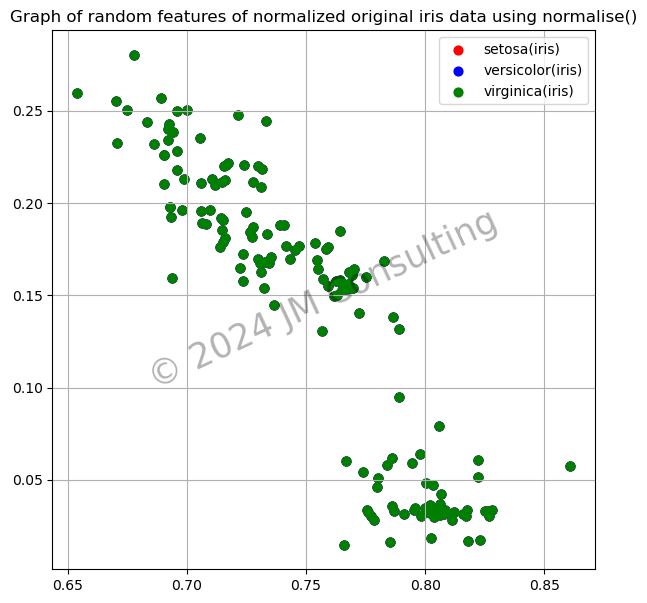

In [10]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1)
ax.set_title('Graph of random features of normalized original iris data using normalise()')

targets = ['setosa(iris)', 'versicolor(iris)', 'virginica(iris)']
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
	indicesNeeded = original_iris_dataframe['target'] == target
	ax.scatter(normalized_X_iris[:,0], normalized_X_iris[:,3], 
	c = color, 
	s = 40)
ax.legend(targets)
ax.grid()
copyright = "\u00A9" + " " + str(date.today().year) + " " + "JM Consulting"
#current_year = str(date.today().year)
#print("copyright : % s"%("\u00A9"))
plt.text(0.5, 0.5, copyright, alpha=0.3, fontsize=25, rotation=25, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

### USE MINMAX SCALER

In [11]:
#use the scikit-learn preprocessing.MinMaxScaler() function to normalize 
#each feature by scaling the data to a range by feature (column).
#The MinMaxScaler() function scales each feature individually so that 
#the values have a given minimum and maximum value, with a default of 0 and 1.

In [12]:
iris_scaler = StandardScaler()
iris_scaler.fit(original_iris_dataframe)
iris_dataframe_min_max_scaling = iris_scaler.transform(original_iris_dataframe)
#z_score_scaling_iris_dataframe = pd.DataFrame(X_iris_z_score_scaling, columns = iris.feature_names)
print("Min Max Normalized iris dataframe : ")
print(iris_dataframe_min_max_scaling)

Min Max Normalized iris dataframe : 
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00
  -1.22474487e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00
  -1.22474487e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00
  -1.22474487e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00
  -1.22474487e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00
  -1.22474487e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00
  -1.22474487e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00
  -1.22474487e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00
  -1.22474487e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00
  -1.22474487e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00
  -1.22474487e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00
  -1.22474487e+00]
 [-1.26418478e+00  7.8880758

In [13]:
scaler = preprocessing.MinMaxScaler()
iris_scaler.fit(X_iris)
X_iris_min_max_scaling = iris_scaler.transform(X_iris)
print("Min Max Normalized X iris data : ")
print(X_iris_min_max_scaling)

Min Max Normalized X iris data : 
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.1699881

In [14]:
y_iris_reshaped = y_iris.reshape(-1,1)
scaler = preprocessing.MinMaxScaler()
iris_scaler.fit(y_iris_reshaped)
y_iris_min_max_scaling = iris_scaler.transform(y_iris_reshaped)
print("Min Max Normalized y iris data : ")
print(y_iris_min_max_scaling)

Min Max Normalized y iris data : 
[[-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0. 

### PLOTTING FOR RANDOM FEATURES FOR NORMALIZED IRIS DATA using MinMaxScaler()

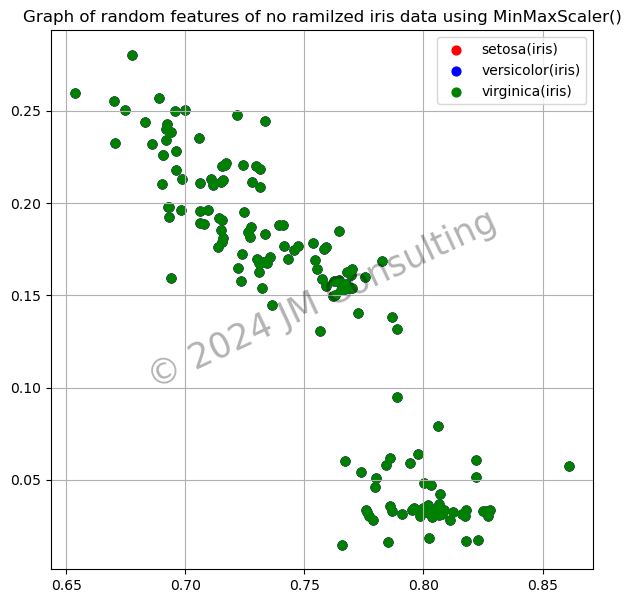

In [15]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1)
ax.set_title('Graph of random features of no ramilzed iris data using MinMaxScaler()')

targets = ['setosa(iris)', 'versicolor(iris)', 'virginica(iris)']
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
	indicesNeeded = original_iris_dataframe['target'] == target
	ax.scatter(normalized_X_iris[:,0], normalized_X_iris[:,3], 
	c = color, 
	s = 40)
ax.legend(targets)
ax.grid()
copyright = "\u00A9" + " " + str(date.today().year) + " " + "JM Consulting"
#current_year = str(date.today().year)
#print("copyright : % s"%("\u00A9"))
plt.text(0.5, 0.5, copyright, alpha=0.3, fontsize=25, rotation=25, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

### COMPARE RESULTS OF NORMALIZATION USING sklearn.preprocessing.normalize() AND sklearn.preprocessing.MaxScaler()

In [16]:
# PRINT A TABLE FOR THE ORIGINAL IRIS DATAFRAME VALUES VS NORMALIZED IRIS DATAFRAME VALUES UGING normalize() VS NORMALIZED IRIS DATAFRAME VALUES UGING MinMaxScaler()
for i in range(len(original_iris_dataframe.values)):
	data = [original_iris_dataframe.values[i], normalized_iris_dataframe[i], iris_dataframe_min_max_scaling[i]]
	#data = [dataset_2[i], dataset_2_z_score[i]]
	t = Texttable()
	t.add_rows([['Original iris data frame values', 'Normalized iris dataframe values USING sklearn.preprocessing.normalize()', 'Normalized iris dataframe values USING sklearn.preprocessing.MinMaxScaler()'], data])
	#t.add_rows([['Original dataset_2 values', 'Z-score dataset_2 values'], data])
	print(t.draw())

+--------------------------+-------------------------+-------------------------+
| Original iris data frame |     Normalized iris     |     Normalized iris     |
|          values          | dataframe values USING  | dataframe values USING  |
|                          | sklearn.preprocessing.n | sklearn.preprocessing.M |
|                          |       ormalize()        |      inMaxScaler()      |
+==========================+=========================+=========================+
| [5.1 3.5 1.4 0.2 0. ]    | [0.80377277 0.55160877  | [-0.90068117            |
|                          | 0.22064351 0.0315205    | 1.01900435 -1.34022653  |
|                          | 0.        ]             | -1.3154443              |
|                          |                         | -1.22474487]            |
+--------------------------+-------------------------+-------------------------+
+--------------------------+-------------------------+-------------------------+
| Original iris data frame |

+--------------------------+-------------------------+-------------------------+
| Original iris data frame |     Normalized iris     |     Normalized iris     |
|          values          | dataframe values USING  | dataframe values USING  |
|                          | sklearn.preprocessing.n | sklearn.preprocessing.M |
|                          |       ormalize()        |      inMaxScaler()      |
+==========================+=========================+=========================+
| [6.  3.4 4.5 1.6 1. ]    | [0.71022082 0.40245847  | [0.18982966 0.78880759  |
|                          | 0.53266562 0.18939222   | 0.42173371 0.52740629   |
|                          | 0.11837014]             | 0.        ]             |
+--------------------------+-------------------------+-------------------------+
+--------------------------+-------------------------+-------------------------+
| Original iris data frame |     Normalized iris     |     Normalized iris     |
|          values          |

### STANDARDIZE THE DATA

#### USING STANDARDSCALER

In [17]:
#Lets do some standardization
iris_scaler = StandardScaler()
iris_scaler.fit(original_iris_dataframe)
iris_dataframe_standard_scaler = iris_scaler.transform(original_iris_dataframe)
print("standard scaler iris dataframe : ")
print(iris_dataframe_standard_scaler)

standard scaler iris dataframe : 
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00
  -1.22474487e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00
  -1.22474487e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00
  -1.22474487e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00
  -1.22474487e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00
  -1.22474487e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00
  -1.22474487e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00
  -1.22474487e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00
  -1.22474487e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00
  -1.22474487e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00
  -1.22474487e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00
  -1.22474487e+00]
 [-1.26418478e+00  7.88807586e-

In [18]:
#Lets do some standardization
iris_scaler = StandardScaler()
iris_scaler.fit(X_iris)
X_iris_standard_scaler = iris_scaler.transform(X_iris)
standard_scaler_x_iris_dataframe = pd.DataFrame(X_iris_standard_scaler, columns = iris.feature_names)
print("standard scaler iris dataframe")
print(standard_scaler_x_iris_dataframe)

standard scaler iris dataframe
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]


In [19]:
standard_scaler_x_iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [20]:
X_iris_standard_scaler

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [21]:
#Lets do some standardization
y_iris_reshaped = y_iris.reshape(-1,1)
iris_scaler = StandardScaler()
iris_scaler.fit(y_iris_reshaped)
y_iris_standard_scaler = iris_scaler.transform(y_iris_reshaped)
standard_scaler_y_iris_dataframe = pd.DataFrame(y_iris_standard_scaler)
print("standard scaler y iris dataframe")
print(standard_scaler_y_iris_dataframe)

standard scaler y iris dataframe
            0
0   -1.224745
1   -1.224745
2   -1.224745
3   -1.224745
4   -1.224745
..        ...
145  1.224745
146  1.224745
147  1.224745
148  1.224745
149  1.224745

[150 rows x 1 columns]


In [22]:
standard_scaler_y_iris_dataframe

,0
0,-1.224745
1,-1.224745
2,-1.224745
3,-1.224745
4,-1.224745
...,...
145,1.224745
146,1.224745
147,1.224745
148,1.224745


In [23]:
y_iris_standard_scaler

array([[-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1.22474487],
       [-1

#### CALCULATE z_score

In [24]:
iris_dataframe_to_z_score = stats.zscore(original_iris_dataframe)
print("Z-score for dataset 2 : ")
iris_dataframe_to_z_score

Z-score for dataset 2 : 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,1.224745
146,0.553333,-1.282963,0.705921,0.922303,1.224745
147,0.795669,-0.131979,0.819596,1.053935,1.224745
148,0.432165,0.788808,0.933271,1.448832,1.224745


In [25]:
iris_dataframe_to_z_score.values

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00, -1.22474487e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00, -1.22474487e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00

In [26]:
X_iris_to_z_score = stats.zscore(X_iris)
print("Z-score for X_iris : ")
print(X_iris_to_z_score)

Z-score for X_iris : 
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.453

In [27]:
y_iris_to_z_score = stats.zscore(y_iris)
print("Z-score for y_iris : ")
print(y_iris_to_z_score)

Z-score for y_iris : 
[-1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487
 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487
 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487
 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487
 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487
 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487
 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487
 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487
 -1.22474487 -1.22474487  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.

### COMPARE THE RESULTS OF STANDARDIZATION USING sklearn.preprocessing.StandardScaler() AND scipy.stats.zscore()

In [28]:
# PRINT A TABLE FOR THE ORIGINAL IRIS DATAFRAME VALUES VS STANDARDIZED IRIS DATAFRAME VALUES using StandardScaler() VS STANDARDIZED IRIS DATAFRAME USNG z-score()
for i in range(len(original_iris_dataframe.values)):
	data = [original_iris_dataframe.values[i], iris_dataframe_standard_scaler[i], iris_dataframe_to_z_score.values[i]]
	#data = [dataset_2[i], dataset_2_z_score[i]]
	t = Texttable()
	t.add_rows([['Original iris data frame values', 'Standardised iris dataframe values USING sklearn.preprocessing.StandardScaler()', 'Standardised iris dataframe values using scipy.stats.zscore()'], data])
	#t.add_rows([['Original dataset_2 values', 'Z-score dataset_2 values'], data])
	print(t.draw())

+--------------------------+-------------------------+-------------------------+
| Original iris data frame |    Standardised iris    |    Standardised iris    |
|          values          | dataframe values USING  | dataframe values using  |
|                          | sklearn.preprocessing.S |  scipy.stats.zscore()   |
|                          |     tandardScaler()     |                         |
+==========================+=========================+=========================+
| [5.1 3.5 1.4 0.2 0. ]    | [-0.90068117            | [-0.90068117            |
|                          | 1.01900435 -1.34022653  | 1.01900435 -1.34022653  |
|                          | -1.3154443              | -1.3154443              |
|                          | -1.22474487]            | -1.22474487]            |
+--------------------------+-------------------------+-------------------------+
+--------------------------+-------------------------+-------------------------+
| Original iris data frame |

+--------------------------+-------------------------+-------------------------+
| Original iris data frame |    Standardised iris    |    Standardised iris    |
|          values          | dataframe values USING  | dataframe values using  |
|                          | sklearn.preprocessing.S |  scipy.stats.zscore()   |
|                          |     tandardScaler()     |                         |
+==========================+=========================+=========================+
| [5.1 3.8 1.9 0.4 0. ]    | [-0.90068117            | [-0.90068117            |
|                          | 1.70959465 -1.05603939  | 1.70959465 -1.05603939  |
|                          | -1.05217993             | -1.05217993             |
|                          | -1.22474487]            | -1.22474487]            |
+--------------------------+-------------------------+-------------------------+
+--------------------------+-------------------------+-------------------------+
| Original iris data frame |

+--------------------------+-------------------------+-------------------------+
| Original iris data frame |    Standardised iris    |    Standardised iris    |
|          values          | dataframe values USING  | dataframe values using  |
|                          | sklearn.preprocessing.S |  scipy.stats.zscore()   |
|                          |     tandardScaler()     |                         |
+==========================+=========================+=========================+
| [6.  2.2 4.  1.  1. ]    | [ 0.18982966            | [ 0.18982966            |
|                          | -1.97355361  0.13754657 | -1.97355361  0.13754657 |
|                          | -0.26238682  0.         | -0.26238682  0.         |
|                          | ]                       | ]                       |
+--------------------------+-------------------------+-------------------------+
+--------------------------+-------------------------+-------------------------+
| Original iris data frame |

+--------------------------+-------------------------+-------------------------+
| Original iris data frame |    Standardised iris    |    Standardised iris    |
|          values          | dataframe values USING  | dataframe values using  |
|                          | sklearn.preprocessing.S |  scipy.stats.zscore()   |
|                          |     tandardScaler()     |                         |
+==========================+=========================+=========================+
| [5.4 3.  4.5 1.5 1. ]    | [-0.53717756            | [-0.53717756            |
|                          | -0.13197948  0.42173371 | -0.13197948  0.42173371 |
|                          | 0.3957741   0.        ] | 0.3957741   0.        ] |
+--------------------------+-------------------------+-------------------------+
+--------------------------+-------------------------+-------------------------+
| Original iris data frame |    Standardised iris    |    Standardised iris    |
|          values          |

+--------------------------+-------------------------+-------------------------+
| Original iris data frame |    Standardised iris    |    Standardised iris    |
|          values          | dataframe values USING  | dataframe values using  |
|                          | sklearn.preprocessing.S |  scipy.stats.zscore()   |
|                          |     tandardScaler()     |                         |
+==========================+=========================+=========================+
| [6.7 2.5 5.8 1.8 2. ]    | [ 1.03800476            | [ 1.03800476            |
|                          | -1.28296331  1.16062026 | -1.28296331  1.16062026 |
|                          | 0.79067065  1.22474487] | 0.79067065  1.22474487] |
+--------------------------+-------------------------+-------------------------+
+--------------------------+-------------------------+-------------------------+
| Original iris data frame |    Standardised iris    |    Standardised iris    |
|          values          |

+--------------------------+-------------------------+-------------------------+
| Original iris data frame |    Standardised iris    |    Standardised iris    |
|          values          | dataframe values USING  | dataframe values using  |
|                          | sklearn.preprocessing.S |  scipy.stats.zscore()   |
|                          |     tandardScaler()     |                         |
+==========================+=========================+=========================+
| [6.  2.2 5.  1.5 2. ]    | [ 0.18982966            | [ 0.18982966            |
|                          | -1.97355361  0.70592084 | -1.97355361  0.70592084 |
|                          | 0.3957741   1.22474487] | 0.3957741   1.22474487] |
+--------------------------+-------------------------+-------------------------+
+--------------------------+-------------------------+-------------------------+
| Original iris data frame |    Standardised iris    |    Standardised iris    |
|          values          |

+--------------------------+-------------------------+-------------------------+
| Original iris data frame |    Standardised iris    |    Standardised iris    |
|          values          | dataframe values USING  | dataframe values using  |
|                          | sklearn.preprocessing.S |  scipy.stats.zscore()   |
|                          |     tandardScaler()     |                         |
+==========================+=========================+=========================+
| [7.9 3.8 6.4 2.  2. ]    | [2.4920192  1.70959465  | [2.4920192  1.70959465  |
|                          | 1.50164482 1.05393502   | 1.50164482 1.05393502   |
|                          | 1.22474487]             | 1.22474487]             |
+--------------------------+-------------------------+-------------------------+
+--------------------------+-------------------------+-------------------------+
| Original iris data frame |    Standardised iris    |    Standardised iris    |
|          values          |

+--------------------------+-------------------------+-------------------------+
| Original iris data frame |    Standardised iris    |    Standardised iris    |
|          values          | dataframe values USING  | dataframe values using  |
|                          | sklearn.preprocessing.S |  scipy.stats.zscore()   |
|                          |     tandardScaler()     |                         |
+==========================+=========================+=========================+
| [5.9 3.  5.1 1.8 2. ]    | [ 0.06866179            | [ 0.06866179            |
|                          | -0.13197948  0.76275827 | -0.13197948  0.76275827 |
|                          | 0.79067065  1.22474487] | 0.79067065  1.22474487] |
+--------------------------+-------------------------+-------------------------+


### DIMENSIONALITY REDUCTION

### APPLY PCA

In [29]:
from sklearn.decomposition import PCA
iris_pca = PCA(n_components = 2)
iris_pca.fit(X_iris_standard_scaler)
iris_transformed = iris_pca.transform(X_iris_standard_scaler)
print("Number of samples and dimentions for PCA iris data : " + str(iris_transformed.shape) + "\n")
print("iris_transformed" + "\n")
print(iris_transformed)
print("\n")

iris_transformedDF = pd.DataFrame(data = iris_transformed, columns = ['principal component 1', 'principal component 2' ])
print("description of iris PCA dataframe : " + "\n")
print(iris_transformedDF.head())
print(iris_transformedDF.describe())
print("\n")

print("iris transformed Dataframe : " + "\n")
print(iris_transformedDF)
print("\n")

iris_JoinedDF = pd.concat([iris_transformedDF, original_iris_dataframe[['target']]], axis = 1)
print("description of new iris dataframe : " + "\n")
print(iris_JoinedDF.head())
print(iris_JoinedDF.describe())
print("\n")

print("iris_JoinedDF : " + "\n")
print(iris_JoinedDF)
print("\n")

# iris data PCA explained Variance ratio 
iris_data_explained_variance = np.var(iris_transformed, axis=0)
iris_data_explained_variance_ratio = iris_data_explained_variance / np.sum(iris_data_explained_variance)
iris_explnd_vrance_ratio = np.cumsum(iris_data_explained_variance_ratio)
#iris_explnd_vrance = iris_pca.explained_variance_ratio
print("iris data PCA explained Variance ratio : % s"%(iris_explnd_vrance_ratio))

Number of samples and dimentions for PCA iris data : (150, 2)

iris_transformed

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 

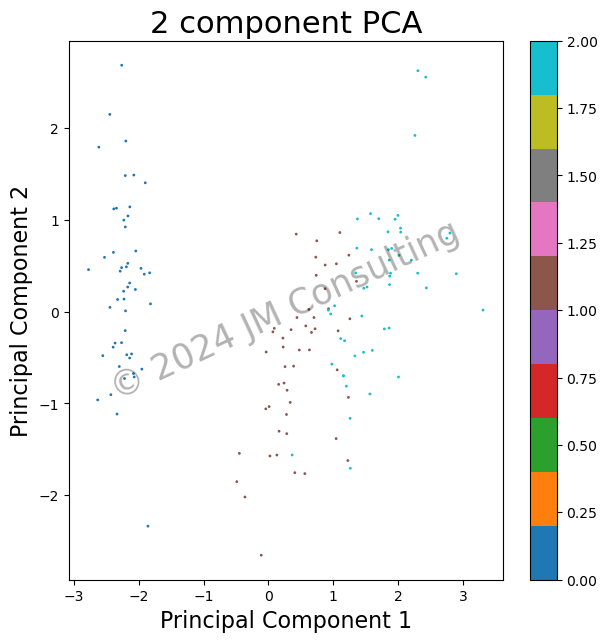

In [30]:
#Visualise 2D Projection
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 16)
ax.set_ylabel('Principal Component 2', fontsize = 16)
ax.set_title('2 component PCA', fontsize = 22)
scatter = plt.scatter(iris_transformed[:, 0], iris_transformed[:, 1], c=y_iris.astype(int), cmap='tab10', s=1)
plt.colorbar(scatter)
copyright = "\u00A9" + " " + str(date.today().year) + " " + "JM Consulting"
plt.text(0.5, 0.5, copyright, alpha=0.3, fontsize=25, rotation=25, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

### Apply LDA

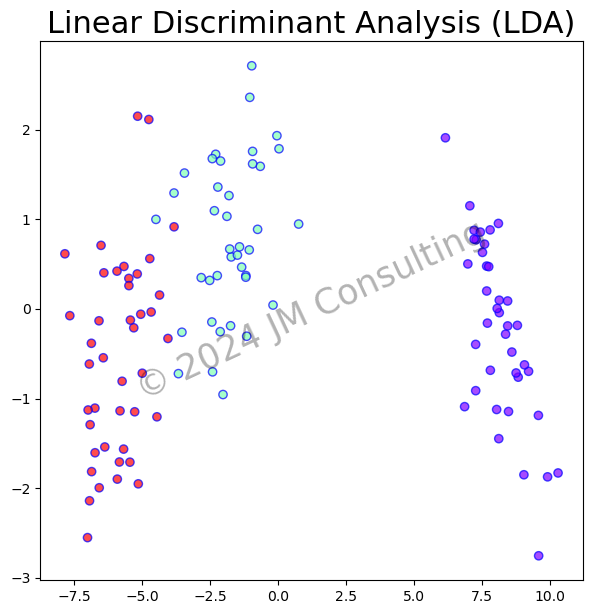

In [31]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

le = LabelEncoder() 
y_iris = le.fit_transform(y_iris) 

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2) 

# apply Linear Discriminant Analysis 
lda = LinearDiscriminantAnalysis(n_components=2) 
X_train = lda.fit_transform(X_train, y_train) 
X_test = lda.transform(X_test) 

# plot the scatterplot
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1)
#ax.set_xlabel('Principal Component 1', fontsize = 16)
#ax.set_ylabel('Principal Component 2', fontsize = 16)
ax.set_title('Linear Discriminant Analysis (LDA)', fontsize = 22)
plt.scatter( X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b' ) 
copyright = "\u00A9" + " " + str(date.today().year) + " " + "JM Consulting"
plt.text(0.5, 0.5, copyright, alpha=0.3, fontsize=25, rotation=25, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

### APPLY RANDOM FOREST CLASSIFIER AFTER USING LDA DIMENSIONALITY REDUCTION

In [32]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix

# classify using random forest classifier 
classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 

# print the accuracy and confusion matrix 
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) + "\n") 
conf_m = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix")
print(conf_m)

Accuracy : 0.9333333333333333

Confusion Matrix
[[11  0  0]
 [ 0 11  0]
 [ 0  2  6]]


### Apply T-Distributed Schotastic Neighbor Embedding (t-SNE)

/home/jehoram/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jehoram/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


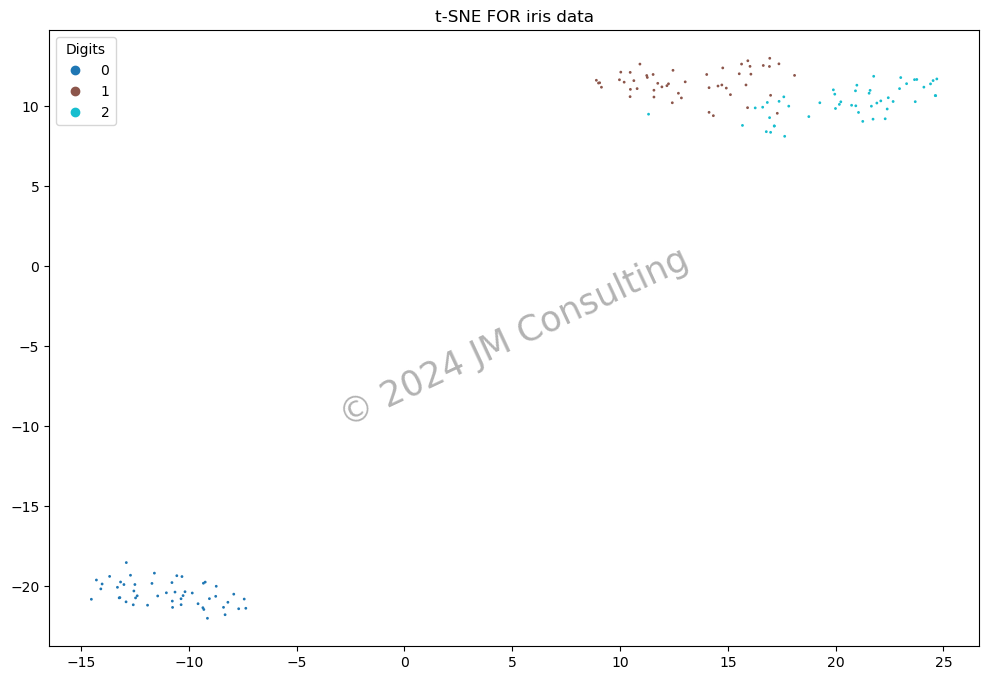

In [33]:
from sklearn.manifold import TSNE
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_iris)

# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_iris.astype(int), cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE FOR iris data')
copyright = "\u00A9" + " " + str(date.today().year) + " " + "JM Consulting"
plt.text(0.5, 0.5, copyright, alpha=0.3, fontsize=25, rotation=25, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()